In [1]:
from tweepy import OAuthHandler
from tweepy import API
import credentials as cr
from slistener import MyStreamListener
from tweepy import Stream


In [2]:
# Store OAuth authentication credentials in relevant variables(this credentials are imported from as a module)
# Consumer key authentication
auth = OAuthHandler(cr.consumer_key, cr.consumer_secret)
# Access key authentication
auth.set_access_token(cr.access_token, cr.access_token_secret)

# Set up the API with the authentication handler
api = API(auth)


In [4]:
words_to_find = ['#python', '#rstats']

# Instantiate the SListener object 
listen = MyStreamListener(api)

# Instantiate the Stream object
stream = Stream(auth, listen)

# Begin collecting data
stream.filter(track = words_to_find)

In [5]:
# Import package
import json
from flatten_tweets import flatten_tweets

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")


tweets = flatten_tweets(tweets_file)
# Read in tweets and store in list: tweets_data
#for line in tweets_file:
 #   tweet = json.loads(line)
  #  tweets_data.append(tweet)
    

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets[0].keys())



dict_keys(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'extended_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms', 'user-screen_name', 'extended_tweet-full_text'])


In [6]:
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets)

df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet',
       'extended_tweet-full_text', 'favorite_count', 'favorited',
       'filter_level', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'retweeted_status',
       'retweeted_status-text', 'retweeted_status-user-screen_name', 'source',
       'text', 'timestamp_ms', 'truncated', 'user', 'user-screen_name'],
      dtype='object')

In [7]:
# Print created_at to see the original format of datetime in Twitter data
print(df['created_at'].head())

0    Sat Sep 08 10:42:40 +0000 2018
1    Sat Sep 08 10:42:53 +0000 2018
2    Sat Sep 08 10:42:58 +0000 2018
3    Sat Sep 08 10:44:16 +0000 2018
4    Sat Sep 08 10:44:18 +0000 2018
Name: created_at, dtype: object


In [8]:
# Convert the created_at column to np.datetime object

df['created_at'] = pd.to_datetime(df['created_at'])

# Print created_at to see new format
print(df['created_at'].head())

# Set the index of ds_tweets to created_at
df = df.set_index('created_at')

0   2018-09-08 10:42:40
1   2018-09-08 10:42:53
2   2018-09-08 10:42:58
3   2018-09-08 10:44:16
4   2018-09-08 10:44:18
Name: created_at, dtype: datetime64[ns]


In [9]:
print(df['user-screen_name'].head())

created_at
2018-09-08 10:42:40      workinbigdata
2018-09-08 10:42:53           ericsin8
2018-09-08 10:42:58           akdm_bot
2018-09-08 10:44:16        CrisiDomCar
2018-09-08 10:44:18    timelyportfolio
Name: user-screen_name, dtype: object


In [10]:
df.columns



Index(['contributors', 'coordinates', 'display_text_range', 'entities',
       'extended_entities', 'extended_tweet', 'extended_tweet-full_text',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'retweeted_status',
       'retweeted_status-text', 'retweeted_status-user-screen_name', 'source',
       'text', 'timestamp_ms', 'truncated', 'user', 'user-screen_name'],
      dtype='object')

In [11]:
df['retweeted_status-text'].head()

created_at
2018-09-08 10:42:40                                                  NaN
2018-09-08 10:42:53    VIDEO: See firsthand how to send predictions f...
2018-09-08 10:42:58    Tools for Working with #Excel and #Python\nhtt...
2018-09-08 10:44:16    La semana que viene estaremos en la  sede del ...
2018-09-08 10:44:18    🎉 initial #rstats pull request for @ApacheArro...
Name: retweeted_status-text, dtype: object

In [12]:
def check_word_in_tweet(word, data):
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['user-screen_name'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['retweeted_status-user-screen_name'].str.contains(word, case = False)
    contains_column |= data['retweeted_status-text'].str.contains(word, case=False)
    return contains_column

In [16]:
df['python'] = check_word_in_tweet('#python', df)
df['rstats'] = check_word_in_tweet('#rstats', df)

In [17]:
print(df['python'].head())

created_at
2018-09-08 10:42:40     True
2018-09-08 10:42:53    False
2018-09-08 10:42:58     True
2018-09-08 10:44:16    False
2018-09-08 10:44:18    False
Name: python, dtype: bool


In [33]:
# Print proportion of tweets mentioning #python

print("Proportion of #python tweets:", np.sum(df['python'] / df.shape[0])
       
print("Proportion of #rstats tweets:", np.sum(df['rstats'] / df.shape[0])

SyntaxError: invalid syntax (<ipython-input-33-ffbe66c6d6af>, line 4)

In [31]:
# Average of cabify column by day
mean_python = df['python'].resample('1d').mean()

# Average of taxi column by day
mean_r = df['rstats'].resample('1d').mean()


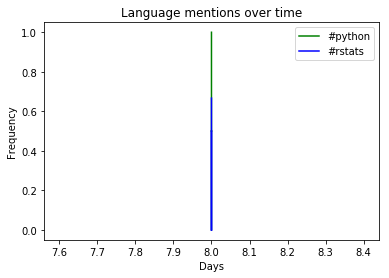

In [38]:
import matplotlib.pyplot as plt

# Plot mean python by day(green)/mean rstats by day(blue)
plt.plot(mean_python.index.day, mean_python, color = 'green')
plt.plot(mean_r.index.day, mean_r, color='blue')

# Add labels and show
plt.xlabel('Days'); plt.ylabel('Frequency')
plt.title('Language mentions over time')
plt.legend(('#python', '#rstats'))
plt.show()


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
